# Pandas SQL Query

When working in the Jupyter notebook environment, we can actually use **pandas to run SQL queries and display the results neatly as a DataFrame object**. We create a `sqlite3.Connection` instance as usual and then use `pandas.read_sql_query(sql, con)` to handle running the query and returning the results in a table:

In [45]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

# Show all tables
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [46]:
# Print first 5 rows of facts table
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


If we had used the **default sqlite3 querying method**, we would have gotten back **nested tuples**:

In [47]:
print(conn.execute('SELECT * FROM facts LIMIT 5').fetchall())

[(1, 'af', 'Afghanistan', 652230, 652230, 0, 32564342, 2.32, 38.57, 13.89, 1.51, '2015-11-01 13:19:49.461734', '2015-11-01 13:19:49.461734'), (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3, '2015-11-01 13:19:54.431082', '2015-11-01 13:19:54.431082'), (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92, '2015-11-01 13:19:59.961286', '2015-11-01 13:19:59.961286'), (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0, '2015-11-01 13:20:03.659945', '2015-11-01 13:20:03.659945'), (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46, '2015-11-01 13:20:08.625072', '2015-11-01 13:20:08.625072')]


# Dataset

Here are the descriptions for some of the columns:

* name - The name of the country.
* area - The total land and sea area of the country.
* population - The country's population.
* population_growth- The country's population growth as a percentage.
* birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
* death_rate - The country's death rate, or the number of death a year per 1,000 people.
* area- The country's total area (both land and water).
* area_land - The country's land area in square kilometers.
* area_water - The country's waterarea in square kilometers.

## Summary statistics

Let's explore the following statistics:
* minimum population
* maximum population
* minimum population growth
* maximum population growth


In [48]:
pd.read_sql_query("SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts", conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


### Findings: 
* there's a country with a population of 0
* there's a country with a population of 7256490011 (or more than 7.2 billion people)

Let's zoom in on just these countries:

In [49]:
# Print all Min countries
pd.read_sql_query("SELECT * FROM facts WHERE population = (SELECT MIN(population) FROM facts)",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [50]:
#Max population countries:
pd.read_sql_query("SELECT * FROM facts WHERE population = (SELECT MAX(population) FROM facts)",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


### Findings

* the world is included as a separate row
* Antarctica is included and has no inhabitants (https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html)

### Displaying Query data in histogram
Let's generate histograms for the **rest of the countries** in the table, ignoring these 2 rows. You'll want to write a query that returns all of the values in the columns you want to visualize:



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2847: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a8b7f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a4a54e0>]], dtype=object)

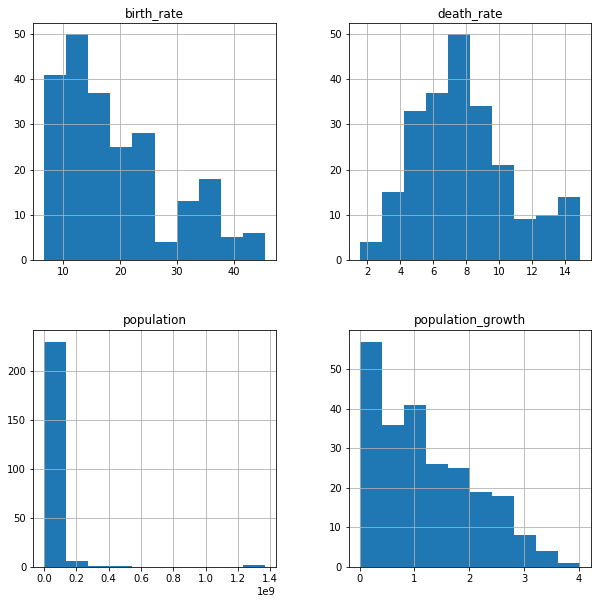

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_sql_query('SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population > (SELECT MIN(population) FROM facts) AND population < (SELECT MAX(population) FROM facts)', conn)
#print(data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

data.hist(ax=ax)


### Which countries have the highest population density (population / area)

In [56]:
pd.read_sql_query("SELECT name, area, population, population/area as density FROM facts ORDER BY density DESC LIMIT 10", conn)

,name,area,population,density
0,Macau,28,592731,21168
1,Monaco,2,30535,15267
2,Singapore,697,5674472,8141
3,Hong Kong,1108,7141106,6445
4,Gaza Strip,360,1869055,5191
5,Gibraltar,6,29258,4876
6,Bahrain,760,1346613,1771
7,Maldives,298,393253,1319
8,Malta,316,413965,1310
9,Bermuda,54,70196,1299


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10aae47f0>], dtype=object)

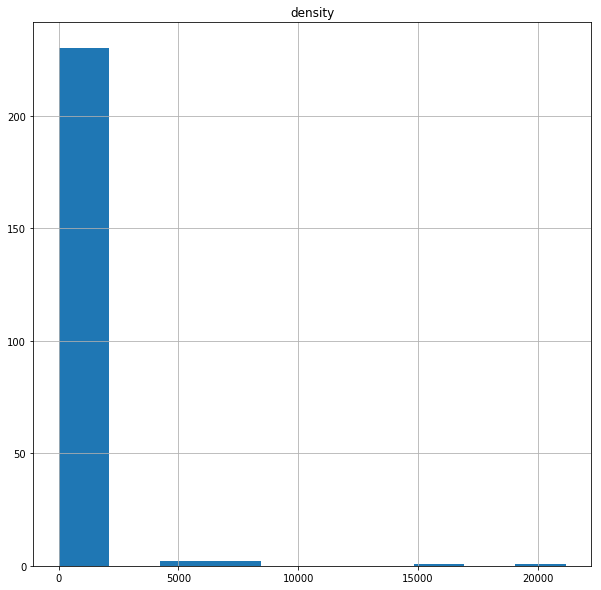

In [69]:
data2 = pd.read_sql_query("SELECT population/area as density FROM facts", conn)
# print(data2)

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)

data2.hist(ax=ax2)